<a href="https://colab.research.google.com/github/yuuki-kusumoto/kusumoto/blob/master/%E5%A4%9A%E5%80%A4%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
pip install transformers

In [3]:
!apt install aptitude swig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
aptitude is already the newest version (0.8.10-6ubuntu1).
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [4]:

!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y

mecab is already installed at the requested version (0.996-5)
libmecab-dev is already installed at the requested version (0.996-5)
mecab-ipadic-utf8 is already installed at the requested version (2.7.0-20070801+main-1)
git is already installed at the requested version (1:2.17.1-1ubuntu0.8)
make is already installed at the requested version (4.1-9.1ubuntu1)
curl is already installed at the requested version (7.58.0-2ubuntu3.13)
xz-utils is already installed at the requested version (5.2.2-1.3)
file is already installed at the requested version (1:5.32-2ubuntu0.4)
mecab is already installed at the requested version (0.996-5)
libmecab-dev is already installed at the requested version (0.996-5)
mecab-ipadic-utf8 is already installed at the requested version (2.7.0-20070801+main-1)
git is already installed at the requested version (1:2.17.1-1ubuntu0.8)
make is already installed at the requested version (4.1-9.1ubuntu1)
curl is already installed at the requested version (7.58.0-2ubuntu3.13)


In [5]:
pip install mecab-python3

In [6]:
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git

fatal: destination path 'mecab-ipadic-neologd' already exists and is not an empty directory.


In [7]:
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n -a

[install-mecab-ipadic-NEologd] : Start..
[install-mecab-ipadic-NEologd] : Check the existance of libraries
[install-mecab-ipadic-NEologd] :     find => ok
[install-mecab-ipadic-NEologd] :     sort => ok
[install-mecab-ipadic-NEologd] :     head => ok
[install-mecab-ipadic-NEologd] :     cut => ok
[install-mecab-ipadic-NEologd] :     egrep => ok
[install-mecab-ipadic-NEologd] :     mecab => ok
[install-mecab-ipadic-NEologd] :     mecab-config => ok
[install-mecab-ipadic-NEologd] :     make => ok
[install-mecab-ipadic-NEologd] :     curl => ok
[install-mecab-ipadic-NEologd] :     sed => ok
[install-mecab-ipadic-NEologd] :     cat => ok
[install-mecab-ipadic-NEologd] :     diff => ok
[install-mecab-ipadic-NEologd] :     tar => ok
[install-mecab-ipadic-NEologd] :     unxz => ok
[install-mecab-ipadic-NEologd] :     xargs => ok
[install-mecab-ipadic-NEologd] :     grep => ok
[install-mecab-ipadic-NEologd] :     iconv => ok
[install-mecab-ipadic-NEologd] :     patch => ok
[install-mecab-ipadi

In [8]:
import subprocess

cmd='echo `mecab-config --dicdir`"/mecab-ipadic-neologd"'
path_neologd = (subprocess.Popen(cmd, stdout=subprocess.PIPE,
                           shell=True).communicate()[0]).decode('utf-8')

In [9]:
pip install ipadic

In [10]:
pip install mecab-python3

In [11]:
pip install unidic-lite

In [12]:
# MeCabとtransformersを用意する
!apt install aptitude swig
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
# 以下で報告があるようにmecab-python3のバージョンを0.996.5にしないとtokezerで落ちる
# https://stackoverflow.com/questions/62860717/huggingface-for-japanese-tokenizer
!pip install mecab-python3==0.996.5
!pip install unidic-lite # これないとMeCab実行時にエラーで落ちる
!pip install transformers

Reading package lists... Done
Building dependency tree       
Reading state information... Done
aptitude is already the newest version (0.8.10-6ubuntu1).
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
mecab is already installed at the requested version (0.996-5)
libmecab-dev is already installed at the requested version (0.996-5)
mecab-ipadic-utf8 is already installed at the requested version (2.7.0-20070801+main-1)
git is already installed at the requested version (1:2.17.1-1ubuntu0.8)
make is already installed at the requested version (4.1-9.1ubuntu1)
curl is already installed at the requested version (7.58.0-2ubuntu3.13)
xz-utils is already installed at the requested version (5.2.2-1.3)
file is already installed at the requested version (1:5.32-2ubuntu0.4)
mecab is already installed at the requested version (0.996-5)
libmecab-dev is already installed at the requested version (0.996-5)
mecab-ipadic-utf8 is already instal

In [13]:
pip install "transformers==2.5.1"

In [14]:
pip install transformers

In [15]:
import torch
from transformers.modeling_bert import BertModel
from transformers.tokenization_bert_japanese import BertJapaneseTokenizer

csvデータの読み込み

In [16]:
import pandas as pd

df1 = pd.read_csv('travel.csv', index_col=0)
df1.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,text,breakfast_po,breakfast_ne,dinner_po,dinnerne,bath_po,bath_ne,servis_po,service_ne,state_po,state_ne,facility_po,facility_ne,room_po,room_ne
0,3月30日宿泊。,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,今回は函館観光というよりも、こちらの別邸宿泊が目的だったので、早めにチェックインしてホテルラ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,低層階のシャワーブースのみのお部屋でしたが、広々とした部屋のうえ、ソファーやダイニングテーブ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
3,洗面化粧台の電球が切れていましたが、すぐに対応して頂きました。,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4,また、洗面所に手拭きタオルが用意されていなかったので、トイレにあったタオルを移動して手拭きと...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [17]:
df1.columns=['text','breakfast_po',	'breakfast_ne',	'dinner_po',	'dinner_ne',	'bath_po',	'bath_ne',	'servis_po',	'service_ne',	'state_po',	'state_ne',	'facility_po',	'facility_ne'	,'room_po', 'room_ne']

In [18]:
df1["text"]

0                                                 3月30日宿泊。
1        今回は函館観光というよりも、こちらの別邸宿泊が目的だったので、早めにチェックインしてホテルラ...
2        低層階のシャワーブースのみのお部屋でしたが、広々とした部屋のうえ、ソファーやダイニングテーブ...
3                          洗面化粧台の電球が切れていましたが、すぐに対応して頂きました。
4        また、洗面所に手拭きタオルが用意されていなかったので、トイレにあったタオルを移動して手拭きと...
                               ...                        
76619     サウスウイングに泊まったが、食事やお風呂に行くのに外を歩かないと行けないので冬場は本当につらい。
76620                                  ここは宿泊者に対して優遇がなさすぎる。
76621      イルミネーション、各種レクリエーションが日帰り客と同額だし、駐車料金も取られてしまい絶句した。
76622                               ショップでの買物10%OFFしか優遇がない。
76623    サウスウイングは建物が古く不便を強いられるので、何かメリットがないとリピートする気になれない...
Name: text, Length: 76624, dtype: object

In [19]:
df = df1.fillna(0)
df.head()

,text,breakfast_po,breakfast_ne,dinner_po,dinner_ne,bath_po,bath_ne,servis_po,service_ne,state_po,state_ne,facility_po,facility_ne,room_po,room_ne
0,3月30日宿泊。,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,今回は函館観光というよりも、こちらの別邸宿泊が目的だったので、早めにチェックインしてホテルラ...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,低層階のシャワーブースのみのお部屋でしたが、広々とした部屋のうえ、ソファーやダイニングテーブ...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,洗面化粧台の電球が切れていましたが、すぐに対応して頂きました。,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,また、洗面所に手拭きタオルが用意されていなかったので、トイレにあったタオルを移動して手拭きと...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [20]:
print(df.dtypes)

text             object
breakfast_po     object
breakfast_ne    float64
dinner_po       float64
dinner_ne       float64
bath_po         float64
bath_ne         float64
servis_po       float64
service_ne      float64
state_po        float64
state_ne        float64
facility_po     float64
facility_ne     float64
room_po         float64
room_ne         float64
dtype: object


データフレーム内の値をfloat型からobject型に変換

In [21]:
df_int2 = df[['breakfast_ne',	'dinner_po',	'dinner_ne',	'bath_po',	'bath_ne',	'servis_po',	'service_ne',	'state_po',	'state_ne',	'facility_po',	'facility_ne'	,'room_po', 'room_ne']].astype(int)
print(df_int2.dtypes)

breakfast_ne    int64
dinner_po       int64
dinner_ne       int64
bath_po         int64
bath_ne         int64
servis_po       int64
service_ne      int64
state_po        int64
state_ne        int64
facility_po     int64
facility_ne     int64
room_po         int64
room_ne         int64
dtype: object


In [22]:
df_object = df_int2.astype(object)
print(df_object.dtypes)

breakfast_ne    object
dinner_po       object
dinner_ne       object
bath_po         object
bath_ne         object
servis_po       object
service_ne      object
state_po        object
state_ne        object
facility_po     object
facility_ne     object
room_po         object
room_ne         object
dtype: object


In [23]:
df_int1 = df[['text','breakfast_po']]
print(df_int1.dtypes)

text            object
breakfast_po    object
dtype: object


In [24]:
a = 0
for i in range(0, len(df_int1)):
  if df["breakfast_po"][i]==1.0:
    a = a + 1

a

7183

In [25]:
df_int1

,text,breakfast_po
0,3月30日宿泊。,0
1,今回は函館観光というよりも、こちらの別邸宿泊が目的だったので、早めにチェックインしてホテルラ...,0
2,低層階のシャワーブースのみのお部屋でしたが、広々とした部屋のうえ、ソファーやダイニングテーブ...,0
3,洗面化粧台の電球が切れていましたが、すぐに対応して頂きました。,0
4,また、洗面所に手拭きタオルが用意されていなかったので、トイレにあったタオルを移動して手拭きと...,0
...,...,...
76619,サウスウイングに泊まったが、食事やお風呂に行くのに外を歩かないと行けないので冬場は本当につらい。,0
76620,ここは宿泊者に対して優遇がなさすぎる。,0
76621,イルミネーション、各種レクリエーションが日帰り客と同額だし、駐車料金も取られてしまい絶句した。,0
76622,ショップでの買物10%OFFしか優遇がない。,0


In [26]:
b = 0
d = 0
for i in range(0, len(df_int1)):
  if df_int1["breakfast_po"][i] == 0 or df_int1["breakfast_po"][i]==1:
    b = b + 1
  else:
    d = d + 1
    df_int1["breakfast_po"][i] = 1
    print(df_int1["breakfast_po"][i])
print(d)    
print(d + b)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


ストリーミング出力は最後の 5000 行に切り捨てられました。
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [27]:
df_int1

,text,breakfast_po
0,3月30日宿泊。,0
1,今回は函館観光というよりも、こちらの別邸宿泊が目的だったので、早めにチェックインしてホテルラ...,0
2,低層階のシャワーブースのみのお部屋でしたが、広々とした部屋のうえ、ソファーやダイニングテーブ...,0
3,洗面化粧台の電球が切れていましたが、すぐに対応して頂きました。,0
4,また、洗面所に手拭きタオルが用意されていなかったので、トイレにあったタオルを移動して手拭きと...,0
...,...,...
76619,サウスウイングに泊まったが、食事やお風呂に行くのに外を歩かないと行けないので冬場は本当につらい。,0
76620,ここは宿泊者に対して優遇がなさすぎる。,0
76621,イルミネーション、各種レクリエーションが日帰り客と同額だし、駐車料金も取られてしまい絶句した。,0
76622,ショップでの買物10%OFFしか優遇がない。,0


In [28]:
len(df["breakfast_po"])

76624

In [29]:
#データフレームを結合させる
df_concat = pd.concat([df_int1, df_object], axis =1)

In [30]:

df = df_concat
print(df.dtypes)

text            object
breakfast_po    object
breakfast_ne    object
dinner_po       object
dinner_ne       object
bath_po         object
bath_ne         object
servis_po       object
service_ne      object
state_po        object
state_ne        object
facility_po     object
facility_ne     object
room_po         object
room_ne         object
dtype: object


In [31]:
df_toulist1 = df[['dinner_po',	'dinner_ne',	'bath_po',	'bath_ne',	'servis_po',	'service_ne',	'state_po',	'state_ne',	'facility_po',	'facility_ne'	,'room_po', 'room_ne']]
df_toulist = df_toulist1.values.tolist()
len(df_toulist)

76624

In [32]:
df_toulist2 = df['text']
df_toulist2

0                                                 3月30日宿泊。
1        今回は函館観光というよりも、こちらの別邸宿泊が目的だったので、早めにチェックインしてホテルラ...
2        低層階のシャワーブースのみのお部屋でしたが、広々とした部屋のうえ、ソファーやダイニングテーブ...
3                          洗面化粧台の電球が切れていましたが、すぐに対応して頂きました。
4        また、洗面所に手拭きタオルが用意されていなかったので、トイレにあったタオルを移動して手拭きと...
                               ...                        
76619     サウスウイングに泊まったが、食事やお風呂に行くのに外を歩かないと行けないので冬場は本当につらい。
76620                                  ここは宿泊者に対して優遇がなさすぎる。
76621      イルミネーション、各種レクリエーションが日帰り客と同額だし、駐車料金も取られてしまい絶句した。
76622                               ショップでの買物10%OFFしか優遇がない。
76623    サウスウイングは建物が古く不便を強いられるので、何かメリットがないとリピートする気になれない...
Name: text, Length: 76624, dtype: object

In [33]:
#フレームに
import pandas as pd

#text, indexの順番にする
tr_df2 = pd.DataFrame({'tr_label' : df_toulist})
tr_df2.head()

,tr_label
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]"
3,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]"
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"


In [34]:
#データフレームを結合させる
df_concat2 = pd.concat([df_toulist2, tr_df2], axis =1)
df_concat2.head()

,text,tr_label
0,3月30日宿泊。,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,今回は函館観光というよりも、こちらの別邸宿泊が目的だったので、早めにチェックインしてホテルラ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,低層階のシャワーブースのみのお部屋でしたが、広々とした部屋のうえ、ソファーやダイニングテーブ...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]"
3,洗面化粧台の電球が切れていましたが、すぐに対応して頂きました。,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]"
4,また、洗面所に手拭きタオルが用意されていなかったので、トイレにあったタオルを移動して手拭きと...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"


In [35]:
df2 = df_concat2.sample(frac=1, random_state=123).reset_index(drop=True)
df2

,text,tr_label
0,他のドーミーインを良く利用させて貰ってますが、京都駅前さんは立地・お風呂・朝食全て大満足でした。,"[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
1,コネクティングルームも新しく部屋はとても清潔で、中居さんは外国人の方でしたが、はにかんだ笑顔...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]"
2,所持しているiPodは旧型ですがオーディオも楽しめ、コーヒーマシン、女性用アメニティとプレミ...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
3,翌日のダックツアーは楽しかったです。,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,始発に間に合うよう早朝にチェックアウトしましたが、タクシーの利用は大丈夫ですか？と声をかけて...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
...,...,...
76619,到着時間が遅くなり、駐車場を探す苦労した。,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
76620,部屋は写真ほど綺麗ではないです。,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
76621,捻挫をしていて旅館に到着してすぐに氷や湿布をお願いしました。,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
76622,部屋は伊香保から北側の山々が見渡せ、とても気持ちが良かったです。,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"


tsvファイルで保存するデータを指定！

In [36]:
df3= df[['text','dinner_po']]
df3

,text,dinner_po
0,3月30日宿泊。,0
1,今回は函館観光というよりも、こちらの別邸宿泊が目的だったので、早めにチェックインしてホテルラ...,0
2,低層階のシャワーブースのみのお部屋でしたが、広々とした部屋のうえ、ソファーやダイニングテーブ...,0
3,洗面化粧台の電球が切れていましたが、すぐに対応して頂きました。,0
4,また、洗面所に手拭きタオルが用意されていなかったので、トイレにあったタオルを移動して手拭きと...,0
...,...,...
76619,サウスウイングに泊まったが、食事やお風呂に行くのに外を歩かないと行けないので冬場は本当につらい。,0
76620,ここは宿泊者に対して優遇がなさすぎる。,0
76621,イルミネーション、各種レクリエーションが日帰り客と同額だし、駐車料金も取られてしまい絶句した。,0
76622,ショップでの買物10%OFFしか優遇がない。,0


In [37]:
df2 = df[['text','dinner_po',	'dinner_ne',	'bath_po',	'bath_ne',	'servis_po',	'service_ne',	'state_po',	'state_ne',	'facility_po',	'facility_ne'	,'room_po', 'room_ne']]
df2 = df2.sample(frac=1, random_state=127).reset_index(drop=True)
df2.shape

(76624, 13)

In [38]:
len_trial = len(df2) // 10
df2 = df2[:len_trial]

In [39]:
df2 = df2[:60]

In [40]:
# tsvファイルで保存する

# 全体の2割の文章数
len_0_2 = len(df2) // 5

# 前から2割をテストデータとする
df2[:len_0_2].to_csv("./test.tsv", sep='\t', index=False, header=None)
print(df2[:len_0_2].shape)

# 前2割からを訓練&検証データとする
df2[len_0_2:].to_csv("./train.tsv", sep='\t', index=False, header=None)
print(df2[len_0_2:].shape)

(12, 13)
(48, 13)


In [41]:
# 乱数シードの固定

import os
import random
import numpy as np
import torch

SEED_VALUE = 1234  # これはなんでも良い
os.environ['PYTHONHASHSEED'] = str(SEED_VALUE)
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
torch.manual_seed(SEED_VALUE)  # PyTorchを使う場合

In [58]:
from torchtext.legacy import data
import torch
import torchtext  # torchtextを使用

In [59]:
def tokenizer_512(input_text):
    """torchtextのtokenizerとして扱えるように、512単語のpytorchでのencodeを定義。ここで[0]を指定し忘れないように"""
    return tokenizer.encode(input_text, max_length=512, return_tensors='pt')[0]


TEXT = torchtext.legacy.data.Field(sequential=True, tokenize=tokenizer_512, use_vocab=False, lower=False,include_lengths=True, batch_first=True, fix_length=512, pad_token=0)
# 注意：tokenize=tokenizer.encodeと、.encodeをつけます。padding[PAD]のindexが0なので、0を指定します。

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL2 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL3 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL4 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL5 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL6 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL7 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL8 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL9 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL10 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL11 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL12 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

In [60]:
import torch
import torchtext
from transformers.modeling_bert import BertModel
from transformers.tokenization_bert_japanese import BertJapaneseTokenizer


# 日本語BERTの分かち書き用tokenizerを宣言
tokenizer = BertJapaneseTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')

In [61]:
# 各tsvファイルを読み込み、分かち書きをしてdatasetに
# 少し時間がかかります
# train_eval：61300個、test：15324個
dataset_train_eval, dataset_test = torchtext.legacy.data.TabularDataset.splits(
    path='.', train='train.tsv', test='test.tsv', format='tsv', fields=[('Text', TEXT), ('Label', LABEL), ('Label2', LABEL2), ('Label3', LABEL3),  ('Label4', LABEL4), ('Label5', LABEL5), ('Label6', LABEL6), ('Label7', LABEL7), ('Label8', LABEL8), ('Label9', LABEL9), ('Label10', LABEL10), ('Label11', LABEL11), ('Label12', LABEL12)])

In [62]:
# torchtext.data.Datasetのsplit関数で訓練データと検証データを分ける
# train_eval：61300個、test：15324個

dataset_train, dataset_eval = dataset_train_eval.split(
    split_ratio = 1 - 15324 / 61300, random_state=random.seed(1234))

# datasetの長さを確認してみる
print(dataset_train.__len__())
print(dataset_eval.__len__())
print(dataset_test.__len__())

# datasetの中身を確認してみる
item = next(iter(dataset_train))
print(item.Text)
print("長さ：", len(item.Text))  

15
5
12
tensor([    2,  2895, 10986,     5,  3005,    12,  3252,    15,    16,   861,
           13,     6,  7377,  1535,    34,  1386,  2992,     8,     3])
長さ： 19


In [63]:
print('訓練データの数', len(dataset_train_eval))
print('1つ目の訓練データkazu', vars(dataset_train_eval[10]))
print(vars(dataset_train_eval[0])['Label'])
print(len(vars(dataset_train_eval[0])))

訓練データの数 20
1つ目の訓練データkazu {'Text': tensor([    2,  2725,     5,  2919,     9,    36,    25,   125,   741,   221,
           38,    13,    58,    16,   206,  2610,    14,     6,  3525,  5204,
          104,     6,  2937,  8229,   104,   537,  2089,    12,     6,    17,
          125,   962,  2919, 16000, 21636,   312,  2575,    18,     6,    13,
         2502,  3913,    10,     8,     3]), 'Label': '0', 'Label2': '1', 'Label3': '0', 'Label4': '0', 'Label5': '0', 'Label6': '0', 'Label7': '0', 'Label8': '0', 'Label9': '0', 'Label10': '0', 'Label11': '0', 'Label12': '0'}
0
13


In [64]:
# datasetの中身を文章に戻し、確認

print(tokenizer.convert_ids_to_tokens(item.Text.tolist()))  # 文章

['[CLS]', 'グラン', '##ピング', 'の', 'イメージ', 'で', '期待', 'し', 'て', 'いく', 'と', '、', 'がっ', '##かり', 'する', '内容', 'です', '。', '[SEP]']


276


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


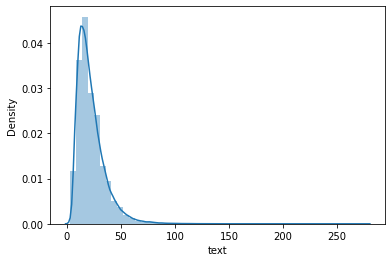

In [65]:
#@title
# 日本語BERTで扱える文章の長さは512
import seaborn as sns
title_length = df_concat2['text'].map(tokenizer.encode).map(len)
print(max(title_length))

sns.distplot(title_length)

In [66]:
# datasetの中身を確認してみる
item = next(iter(dataset_train))
print(item.Text)
print("長さ：", len(item.Text))  
print("ラベル：", item.Label12)

tensor([    2,  2895, 10986,     5,  3005,    12,  3252,    15,    16,   861,
           13,     6,  7377,  1535,    34,  1386,  2992,     8,     3])
長さ： 19
ラベル： 0


In [67]:

item

In [68]:
# datasetの中身を文章に戻し、確認

print(tokenizer.convert_ids_to_tokens(item.Text.tolist()))  # 文章

['[CLS]', 'グラン', '##ピング', 'の', 'イメージ', 'で', '期待', 'し', 'て', 'いく', 'と', '、', 'がっ', '##かり', 'する', '内容', 'です', '。', '[SEP]']


最後にDatasetからミニバッチ単位でデータをロードする処理を実装します。

本家PyTorchのDataLoaderにあたるユーティリティクラスとして、torchtextではIterator (またはその派生クラス) が提供されています。以下のように使います。

ミニバッチごとにFieldで定義した属性名 (Text, Label) でアクセスしてます
ミニバッチごとに、Textの次元数は (batch_size, fix_length) 、Labelの次元数は (batch_size) となります
サイズを小さくするために、Textフィールドに単語ベクトル値ではなく単語IDが入っている点に注意してください。ベクトル表現はネットワーク側で取得する必要があります。

In [53]:
list_sample = df2.to_numpy().tolist()

tsvの読み込み

In [54]:
import csv

l = []
with open('train.tsv', encoding='utf-8', newline='') as f:
    for cols in csv.reader(f, delimiter='\t'):
      l.append(cols)

len(l)

48

In [55]:
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataset import Subset
from sklearn.model_selection import KFold

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
# n_splits分割（ここでは5分割）してCV
kf = KFold(n_splits=3, shuffle=True, random_state=1)

for train_idx, valid_idx in kf.split(df2):
  ls = np.array(df2)
  #trainデータをのリスト
  ls_train = ls[train_idx]
  #そのリストをデータフレームに
  ls_df1 = pd.DataFrame(ls_train)

  #trainデータをのリスト
  ls_test = ls[valid_idx]
  #そのリストをデータフレームに
  ls_df2 = pd.DataFrame(ls_test)

# tsvファイルで保存する

# 前2割からを訓練&検証データとする
  ls_df1.to_csv("./train.tsv", sep='\t', index=False, header=None)
# 前2割からを訓練&検証データとする
  ls_df2.to_csv("./train.tsv", sep='\t', index=False, header=None)

  # 各tsvファイルを読み込み、分かち書きをしてdatasetにします
# 少し時間がかかります
# train_eval：61300個、test：15324個
  dataset_train_eval, dataset_test = torchtext.legacy.data.TabularDataset.splits(
      path='.', train='train.tsv', test='test.tsv', format='tsv', fields=[('Text', TEXT), ('Label', LABEL)])
  
  # torchtext.data.Datasetのsplit関数で訓練データと検証データを分ける
# train_eval：61300個、test：15324個

  dataset_train, dataset_eval = dataset_train_eval.split(
      split_ratio = 0.8, random_state=random.seed(1234))
  
  # 学習・検証を実行する。
  num_epochs = 1

  for i in range(num_epochs):
    net_trained = train_model(net, dataloaders_dict,criterion, optimizer, num_epochs=num_epochs)



# テストデータでの正解率を求める
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    net_trained.eval()   # モデルを検証モードに
    net_trained.to(device)  # GPUが使えるならGPUへ送る

# epochの正解数を記録する変数
    epoch_corrects = 0

    for batch in tqdm(dl_test): 
      inputs = batch.Text[0].to(device)  # 文章  
    # batchはTextとLableの辞書オブジェクト
    # GPUが使えるならGPUにデータを送る
      labels = batch.Label.to(device)  # ラベル

    # 順伝搬（forward）計算
      with torch.set_grad_enabled(False):
        outputs = net_trained(inputs)
        
        loss = criterion(outputs, labels)  # 損失を計算
        _, preds = torch.max(outputs, 1)  # ラベルを予測
        epoch_corrects += torch.sum(preds == labels.data)  # 正解数の合計を更新
        
        #正解率
    epoch_acc = epoch_corrects.double() / len(dl_test.dataset)
        
    print('テストデータ{}個での正解率：{:.4f}'.format(len(dl_test.dataset), epoch_acc))

NameError: ignored

In [69]:
# DataLoaderを作成します（torchtextの文脈では単純にiteraterと呼ばれています）

batch_size = 12

# BERTでは16、32あたりを使用する



dl_train = torchtext.legacy.data.Iterator(
    dataset_train, batch_size=batch_size, train=True)

dl_eval = torchtext.legacy.data.Iterator(
    dataset_eval, batch_size=batch_size, train=False, sort=False)

dl_test = torchtext.legacy.data.Iterator(
    dataset_test, batch_size=batch_size, train=False, sort=False)

# 辞書オブジェクトにまとめる
dataloaders_dict = {"train": dl_train, "val": dl_eval}

In [70]:
# DataLoaderの動作確認 

batch = next(iter(dl_test))
print(batch)
print(batch.Text[0].shape)
print(batch.Label2.shape)


[torchtext.legacy.data.batch.Batch of size 12]
	[.Text]:('[torch.LongTensor of size 12x512]', '[torch.LongTensor of size 12]')
	[.Label]:[torch.LongTensor of size 12]
	[.Label2]:[torch.LongTensor of size 12]
	[.Label3]:[torch.LongTensor of size 12]
	[.Label4]:[torch.LongTensor of size 12]
	[.Label5]:[torch.LongTensor of size 12]
	[.Label6]:[torch.LongTensor of size 12]
	[.Label7]:[torch.LongTensor of size 12]
	[.Label8]:[torch.LongTensor of size 12]
	[.Label9]:[torch.LongTensor of size 12]
	[.Label10]:[torch.LongTensor of size 12]
	[.Label11]:[torch.LongTensor of size 12]
	[.Label12]:[torch.LongTensor of size 12]
torch.Size([12, 512])
torch.Size([12])


In [71]:
from torch import nn


class BertForReview(nn.Module):
    '''BERTモデルにレビュー文の2クラスを判定する部分をつなげたモデル'''

    def __init__(self):
        super(BertForReview, self).__init__()

        # BERTモジュール
        self.bert = model  # 日本語学習済みのBERTモデル

        # headにポジネガ予測を追加
        # 入力はBERTの出力特徴量の次元768、出力は12クラス
        self.cls = nn.Linear(in_features=768, out_features=12)

        # 重み初期化処理
        nn.init.normal_(self.cls.weight, std=0.02)
        nn.init.normal_(self.cls.bias, 0)

    def forward(self, input_ids):
        '''
        input_ids： [batch_size, sequence_length]の文章の単語IDの羅列
        '''

        # BERTの基本モデル部分の順伝搬
        # 順伝搬させる
        result = self.bert(input_ids)  # reult は、sequence_output, pooled_output

        # sequence_outputの先頭の単語ベクトルを抜き出す
        vec_0 = result[0]  # 最初の0がsequence_outputを示す
        vec_0 = vec_0[:, 0, :]  # 全バッチ。先頭0番目の単語の全768要素
        vec_0 = vec_0.view(-1, 768)  # sizeを[batch_size, hidden_size]に変換
        output = self.cls(vec_0)  # 全結合層

        return output

試し

In [119]:
from torch import nn


class BertForReview(nn.Module):
    '''BERTモデルにレビュー文の2クラスを判定する部分をつなげたモデル'''

    def __init__(self):
        super(BertForReview, self).__init__()

        # BERTモジュール
        self.bert = model  # 日本語学習済みのBERTモデル

        # headにポジネガ予測を追加
        # 入力はBERTの出力特徴量の次元768、出力は12クラス
        self.cls = nn.Linear(in_features=768, out_features=12)

        # 重み初期化処理
        nn.init.normal_(self.cls.weight, std=0.02)
        nn.init.normal_(self.cls.bias, 0)

    def forward(self, input_ids):
        '''
        input_ids： [batch_size, sequence_length]の文章の単語IDの羅列
        '''

        # BERTの基本モデル部分の順伝搬
        # 順伝搬させる
        result = self.bert(input_ids)  # reult は、sequence_output, pooled_output

        # sequence_outputの先頭の単語ベクトルを抜き出す
        vec_0 = result[0]  # 最初の0がsequence_outputを示す
        bs = len(result[0])
        vec_0 = [result[0][i][0] for i in range(bs)]  # 全バッチ。先頭0番目の単語の全768要素
        vec_0 = torch.stack(vec_0, dim = 0)
        output = self.cls(vec_0)  # 全結合層

        return output

In [87]:
inputs

tensor([[    2, 25965,    14,  ...,     0,     0,     0],
        [    2,  6777,   266,  ...,     0,     0,     0],
        [    2,    73,    52,  ...,     0,     0,     0],
        ...,
        [    2,  1359,    40,  ...,     0,     0,     0],
        [    2,  8229,   104,  ...,     0,     0,     0],
        [    2,  9285,    61,  ...,     0,     0,     0]])

inputsは単語ID列。
resultの中身 : 要素が二つのタプル、一つ目は単語の埋め込み表現、二つ目は

In [70]:
from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained(
    "cl-tohoku/bert-base-japanese-whole-word-masking", # 日本語Pre trainedモデルの指定
    num_labels = 12, # ラベル数（今回はBinayなので2、数値を増やせばマルチラベルも対応可）
    output_attentions = False, # アテンションベクトルを出力するか
    output_hidden_states = True, # 隠れ層を出力するか
)

In [71]:
out = model(inputs)

In [90]:
len(out[0][0])

12

In [73]:
out[0].shape

torch.Size([12, 12])

In [124]:
_,preds = torch.max(out[0], 1)
preds

NameError: ignored

In [121]:
result = net(inputs)

In [123]:
result

tensor([[ 1.2571e+00,  4.1877e-01,  5.5198e-01, -2.1602e+00,  8.7937e-03,
          7.5296e-01,  1.8681e+00, -2.0886e-01,  2.1352e-01, -8.4040e-02,
          9.7716e-01, -9.7177e-02],
        [ 1.2893e+00,  3.7602e-01,  5.5278e-01, -2.0676e+00, -7.2427e-02,
          7.1033e-01,  2.0363e+00, -1.3068e-01,  3.7475e-01, -1.6150e-01,
          7.6398e-01, -5.2544e-02],
        [ 1.1959e+00,  4.7237e-01,  4.7122e-01, -2.1261e+00,  2.6691e-02,
          5.2315e-01,  1.8530e+00, -7.5183e-02,  3.3149e-01, -6.9146e-02,
          8.6694e-01, -2.5027e-02],
        [ 1.7200e+00,  3.4772e-01,  2.0490e-01, -1.8886e+00, -6.0874e-02,
          8.2774e-01,  1.8193e+00, -3.6821e-01,  2.7948e-01, -1.2735e-01,
          9.3783e-01, -2.4429e-01],
        [ 1.2597e+00,  5.2633e-01,  6.6670e-01, -2.1043e+00, -1.1615e-01,
          6.1504e-01,  1.9195e+00, -1.2308e-01,  5.4196e-01, -6.2355e-03,
          9.7563e-01, -1.1989e-02],
        [ 1.2998e+00,  3.6441e-01,  3.5450e-01, -2.0969e+00,  7.0205e-02,
      

In [108]:
len(result[0])

12

In [109]:
result[0].shape
#[バッチサイズ、　単語列の長さ、　単語の次元数]

torch.Size([12, 512, 768])

In [110]:
#三番目の単語の埋め込み表現
result[0][0][511]

tensor([-1.2043e-01,  1.0877e+00, -1.7286e-01, -7.4156e-02, -4.0711e-01,
         5.1906e-01,  9.3934e-02, -1.9184e-01,  4.9303e-03,  5.5925e-01,
        -5.0573e-01,  6.5261e-01, -2.3165e-01, -7.6444e-01, -7.2013e-02,
         9.5438e-01, -1.2342e-01,  9.0266e-01, -3.2759e-01,  5.9415e-01,
        -1.2384e-01,  1.4790e-01, -4.8759e-01,  4.3042e-01, -6.7281e-01,
         4.8454e-01, -2.1065e-01,  4.8230e-01, -2.3493e-01, -4.0699e-01,
        -5.1014e-01,  4.2236e-01, -4.7336e-01,  9.3755e-02,  5.2259e-01,
         6.9817e-01,  6.0620e-01,  1.1924e-01, -5.5704e-01, -1.0260e-01,
         5.8619e-01, -9.2370e-03,  6.1109e-01, -9.0838e-02, -9.1552e-02,
        -8.3725e-02,  1.9947e-01,  5.5620e-02,  8.3225e-01,  7.7466e-02,
         2.9642e-01, -2.5419e-01,  4.6377e-01, -1.9387e-01, -4.4536e-01,
         5.1387e-02,  5.5005e-02,  1.3444e-01, -3.3294e-03, -5.9384e-01,
        -5.0947e-02, -5.3657e-01, -3.1019e-01, -4.5009e-01, -1.0084e+00,
        -2.5069e-01, -3.0496e-01,  5.1066e-02,  8.6

In [111]:
vec_0 = result[0]  # 最初の0がsequence_outputを示す
vec_0 = vec_0[:, 0, :]  # 全バッチ。先頭0番目の単語の全768要素
vec_0.shape

torch.Size([12, 768])

In [112]:
vec_0 = vec_0.view(-1, 768)  # sizeを[batch_size, hidden_size]に変換
vec_0.shape

torch.Size([12, 768])

In [113]:
cls = nn.Linear(in_features=768, out_features=12)
outing = cls(vec_0)
outing

tensor([[ 0.0921, -0.0216, -0.1953, -0.0232,  0.0008,  0.3894,  0.0208,  0.5026,
          0.1059,  0.3584,  0.1519,  0.0559],
        [ 0.3048, -0.0073, -0.1722, -0.1152, -0.0124,  0.2630,  0.0905,  0.5103,
          0.3254,  0.2793,  0.0559, -0.0200],
        [ 0.1676,  0.1041, -0.2229, -0.0013,  0.0629,  0.5363,  0.0739,  0.5836,
          0.2767,  0.4200, -0.0214,  0.1237],
        [ 0.2509, -0.0271, -0.1399, -0.2093,  0.0496,  0.5113,  0.1738,  0.4756,
          0.2002,  0.2797,  0.1057, -0.0508],
        [ 0.1295, -0.0979, -0.1624, -0.1086,  0.1038,  0.4006,  0.2337,  0.6616,
          0.3086,  0.3114,  0.1029,  0.1131],
        [ 0.3198, -0.0664, -0.1948, -0.0497,  0.1156,  0.3940,  0.1963,  0.4913,
          0.3994,  0.3703,  0.0597,  0.0479],
        [ 0.1713, -0.0927, -0.2333,  0.0263,  0.0304,  0.4413,  0.1777,  0.4465,
          0.2537,  0.3931,  0.0909, -0.0915],
        [ 0.2398, -0.1357, -0.2020, -0.2044,  0.0286,  0.2662,  0.1835,  0.5074,
          0.2268,  0.3583, -0.

In [126]:
_,preds = torch.max(result, 1)
preds

tensor([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [127]:
import transformers
from transformers.modeling_bert import BertModel
model = BertModel.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')

model_name = "cl-tohoku/bert-base-japanese"
tokenizer1 = transformers.BertTokenizer.from_pretrained(model_name)

In [120]:
#モデル構築
net = BertForReview()

# 訓練モードに設定
net.train()

print('ネットワーク設定完了')

ネットワーク設定完了


In [92]:
# 勾配計算を最後のBertLayerモジュールと追加した分類アダプターのみ実行

# 1. まず全部を、勾配計算Falseにしてしまう
for param in net.parameters():
    param.requires_grad = False

# 2. BertLayerモジュールの最後を勾配計算ありに変更
for param in net.bert.encoder.layer[-1].parameters():
    param.requires_grad = True

# 3. 識別器を勾配計算ありに変更
for param in net.cls.parameters():
    param.requires_grad = True

In [93]:
# 最適化手法の設定
import torch.optim as optim

# BERTの元の部分はファインチューニング
optimizer = optim.Adam([
    {'params': net.bert.encoder.layer[-1].parameters(), 'lr': 6e-6},
    {'params': net.cls.parameters(), 'lr': 1e-4}
])

# 損失関数はクロスエントロピーで！
criterion = nn.CrossEntropyLoss()
# nn.LogSoftmax()を計算してからnn.NLLLoss(negative log likelihood loss)を計算

多ラベル分類はバイナリクロスエントロピーで！

In [94]:
# GPUあれば使う
def check_cuda():
    return 'cuda:0' if torch.cuda.is_available() else 'cpu'
device = torch.device(check_cuda())

def try_gpu(target):
    if check_cuda():
        device = torch.device(check_cuda())
        target.to(device)

In [95]:
# 最適化手法の設定
import torch.optim as optim

# BERTの元の部分はファインチューニング
optimizer = optim.Adam([
    {'params': net.bert.encoder.layer[-1].parameters(), 'lr': 6e-6},
    {'params': net.cls.parameters(), 'lr': 1e-4}
])

# 損失関数はクロスエントロピーで！
criterion = nn.BCEWithLogitsLoss()
# nn.LogSoftmax()を計算してからnn.NLLLoss(negative log likelihood loss)を計算

In [96]:
import numpy as np

def softmax_func(x):
    exp_x = np.exp(x)
    return exp_x/np.sum(exp_x)

x = np.array([1, 2, 3])
print(softmax_func(x))

[0.09003057 0.24472847 0.66524096]


In [62]:


try_gpu(criterion)

In [76]:
# モデルを学習させる関数を作成


def train_model(net, dataloaders_dict, criterion, optimizer, num_epochs):

    # GPUが使えるかを確認
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("使用デバイス：", device)
    print('-----start-------')

    # ネットワークをGPUへ
    net.to(device)

    # ネットワークがある程度固定であれば、高速化させる
    torch.backends.cudnn.benchmark = True

    # ミニバッチのサイズ
    batch_size = dataloaders_dict["train"].batch_size

    # epochのループ
    for epoch in range(num_epochs):
        # epochごとの訓練と検証のループ
        for phase in ['train', 'val']:
            if phase == 'train':
                net.train()  # モデルを訓練モードに
            else:
                net.eval()   # モデルを検証モードに

            epoch_loss = 0.0  # epochの損失和
            epoch_corrects = 0  # epochの正解数
            iteration = 1

            # データローダーからミニバッチを取り出すループ
            for batch in (dataloaders_dict[phase]):
                # batchはTextとLableの辞書型変数

                # GPUが使えるならGPUにデータを送る
                inputs = batch.Text[0].to(device)  # 文章
                labels = batch.Label.to(device)  # ラベル
                labels2 = batch.Label2.to(device)
                labels3 = batch.Label3.to(device)
                labels4 = batch.Label4.to(device)
                labels5 = batch.Label5.to(device)
                labels6 = batch.Label6.to(device)
                labels7 = batch.Label7.to(device)
                labels8 = batch.Label8.to(device)
                labels9 = batch.Label9.to(device)
                labels10 = batch.Label10.to(device)
                labels11 = batch.Label11.to(device)
                labels12 = batch.Label12.to(device)
                pa = torch.stack([labels, labels2, labels3, labels4, labels5,labels6,labels7,labels8,labels9,labels10, labels11, labels12], dim = 1)

                pa = torch.tensor(pa, dtype=torch.float32)


                # optimizerを初期化
                optimizer.zero_grad()

                # 順伝搬（forward）計算
                with torch.set_grad_enabled(phase == 'train'):

                    # BERTに入力
                    outputs = net(inputs)
##############################################################################################################################################
###################　　　　　　　ここまではおそらくあってる　　　　　　　###################################################################################
################################################################################################################################################

                    loss = criterion(outputs, pa)  # 損失を計算

#第二引数の1は行。axis = 1と同じ。
#torch.maxは最大値（テンソル）とその要素位置の２つを返しますが、その最大値を_で受けとっています。　ただ、最大値は不要なので適当な名前(_)の変数としています。
                    _, preds = torch.max(outputs, 1)  # ラベルを予測

                    # 訓練時は逆誤差伝搬
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
#10イテレーションごとの計算で、割るときの分母にはバッチサイズに12をかけておく
                        if (iteration % 10 == 0):  # 10iterに1度、lossを表示
                            acc = (torch.sum(preds == pa.data)
                                   ).double()/(12*batch_size)
                            print('イテレーション {} || Loss: {:.4f} || 10iter. || 本イテレーションの正解率：{}'.format(
                                iteration, loss.item(),  acc))

                    iteration += 1

                    # 損失と正解数の合計を更新
                    epoch_loss += loss.item() * batch_size
                    epoch_corrects += torch.sum(preds == pa.data)
                    

            # epochごとのlossと正解率
            epoch_loss = epoch_loss / len(dataloaders_dict[phase].dataset)
            epoch_acc = epoch_corrects.double(
            ) / len(dataloaders_dict[phase].dataset)

            print('Epoch {}/{} | {:^5} |  Loss: {:.4f} Acc: {:.4f}'.format(epoch+1, num_epochs,
                                                                           phase, epoch_loss, epoch_acc))

    return net

In [64]:
# 学習・検証を実行する。
num_epochs = 1

net_trained = train_model(net, dataloaders_dict,
                          criterion, optimizer, num_epochs=num_epochs)

使用デバイス： cpu
-----start-------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


AttributeError: ignored

In [82]:
target = torch.empty(3).random_(2)
target

tensor([1., 0., 0.])

In [79]:
inputs = batch.Text[0].to(device)  # 文章

In [80]:
inputs

tensor([[    2, 25965,    14,  ...,     0,     0,     0],
        [    2,  6777,   266,  ...,     0,     0,     0],
        [    2,    73,    52,  ...,     0,     0,     0],
        ...,
        [    2,  1359,    40,  ...,     0,     0,     0],
        [    2,  8229,   104,  ...,     0,     0,     0],
        [    2,  9285,    61,  ...,     0,     0,     0]])

In [81]:
len(inputs)

12

In [82]:
outputs = net(inputs)

NameError: ignored

In [ ]:
_,preds = torch.max(outputs, 1)  

In [83]:
input_ids

NameError: ignored

outputsで出力されるテンソルには一体どんな意味が？
特定の番目だけがずっと最大値になってる。ここがおそらくおかしい？

In [84]:
outputs

NameError: ignored

In [85]:
torch.mean(outputs[0])

NameError: ignored

In [86]:
preds

NameError: ignored

In [94]:
torch.sum(preds == pa.data).double()/(12*batch_size)

tensor(0., dtype=torch.float64)

In [95]:
print(len(outputs))
len(pa)

12


12

In [69]:
inputs

tensor([[    2, 25965,    14,  ...,     0,     0,     0],
        [    2,  6777,   266,  ...,     0,     0,     0],
        [    2,    73,    52,  ...,     0,     0,     0],
        ...,
        [    2,  1359,    40,  ...,     0,     0,     0],
        [    2,  8229,   104,  ...,     0,     0,     0],
        [    2,  9285,    61,  ...,     0,     0,     0]])

In [107]:
outputs

tensor([[-1.0329,  0.1522,  0.2675, -1.1075,  2.0612, -0.6716,  0.6437, -0.5999,
          0.4474,  1.4986,  0.0570,  0.2086],
        [-1.0183,  0.1603,  0.2806, -1.1149,  2.0637, -0.6719,  0.6458, -0.5937,
          0.4339,  1.5035,  0.0695,  0.1994],
        [-0.9906,  0.1375,  0.3336, -1.1542,  2.0866, -0.6496,  0.6526, -0.6165,
          0.4405,  1.5036,  0.0626,  0.1977],
        [-0.9707,  0.2031,  0.2332, -1.1656,  2.0522, -0.7052,  0.6234, -0.6322,
          0.4442,  1.4241,  0.1370,  0.1391],
        [-1.0216,  0.1371,  0.2798, -1.1002,  2.0575, -0.6670,  0.6394, -0.5887,
          0.4176,  1.5009,  0.0805,  0.2353],
        [-1.0122,  0.1800,  0.2261, -1.1284,  2.0524, -0.6955,  0.6169, -0.6208,
          0.4382,  1.4753,  0.0782,  0.1647],
        [-0.9821,  0.1963,  0.2560, -1.1738,  2.0510, -0.6832,  0.5955, -0.6270,
          0.4279,  1.4444,  0.1196,  0.1831],
        [-1.0053,  0.1530,  0.3057, -1.1439,  2.0750, -0.6589,  0.6536, -0.6035,
          0.4355,  1.5091,  0.

In [111]:
predss = torch.max((outputs), 1)

In [112]:
predss

torch.return_types.max(values=tensor([2.0612, 2.0637, 2.0866, 2.0522, 2.0575, 2.0524, 2.0510, 2.0750, 2.0745,
        2.0381, 2.0692, 2.1082]), indices=tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]))

In [70]:
outputs

tensor([[-0.9219,  0.2986,  0.4349, -1.0054,  2.2371, -0.5753,  0.7902, -0.4756,
          0.5919,  1.6719,  0.1879,  0.3737],
        [-0.9083,  0.3059,  0.4477, -1.0137,  2.2389, -0.5760,  0.7916, -0.4699,
          0.5785,  1.6764,  0.1989,  0.3638],
        [-0.8816,  0.2809,  0.4983, -1.0539,  2.2588, -0.5539,  0.7948, -0.4956,
          0.5822,  1.6741,  0.1920,  0.3589],
        [-0.8587,  0.3519,  0.4051, -1.0620,  2.2328, -0.6078,  0.7734, -0.5061,
          0.5947,  1.6032,  0.2683,  0.3083],
        [-0.9123,  0.2810,  0.4446, -1.0000,  2.2305, -0.5720,  0.7834, -0.4671,
          0.5606,  1.6718,  0.2089,  0.3979],
        [-0.9002,  0.3283,  0.3957, -1.0246,  2.2310, -0.5971,  0.7654, -0.4957,
          0.5857,  1.6520,  0.2108,  0.3324],
        [-0.8703,  0.3439,  0.4256, -1.0712,  2.2299, -0.5863,  0.7444, -0.5021,
          0.5770,  1.6212,  0.2496,  0.3512],
        [-0.8960,  0.2969,  0.4709, -1.0437,  2.2479, -0.5629,  0.7969, -0.4818,
          0.5782,  1.6803,  0.

In [120]:
print(outputs.sigmoid)

<built-in method sigmoid of Tensor object at 0x7ff8b64c10a0>


In [121]:
_,predss = torch.max((outputs), 1)

TypeError: ignored

In [118]:
predss

tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [80]:
pa[0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [78]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("使用デバイス：", device)
print('-----start-------')

使用デバイス： cpu
-----start-------


In [88]:
preds

tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [89]:
pa.data

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [98]:
pb = ([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [99]:
pb = torch.tensor(pb)

In [100]:
batch_size

12

In [113]:
acc = (torch.sum(pb == pa.data)).double()/(12*batch_size)
acc

RuntimeError: ignored

In [74]:
labels = batch.Label.to(device)
labels2 = batch.Label2.to(device)
labels3 = batch.Label3.to(device)
labels4 = batch.Label4.to(device)
labels5 = batch.Label5.to(device)
labels6 = batch.Label6.to(device)
labels7 = batch.Label7.to(device)
labels8 = batch.Label8.to(device)
labels9 = batch.Label9.to(device)
labels10 = batch.Label10.to(device)
labels11 = batch.Label11.to(device)
labels12 = batch.Label12.to(device)

print(labels.shape)
print((labels2))

pa = torch.stack([labels, labels2, labels3, labels4, labels5,labels6,labels7,labels8,labels9,labels10, labels11, labels12], dim = 1)
print(pa.shape)
pa 

NameError: ignored

In [97]:
la=labels.numpy()
la

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [98]:

laa = torch.from_numpy(la)
la2 = labels2.numpy()
len(la2)

12

In [99]:

lA = np.extend(la,la2)
len(lA)

AttributeError: ignored

In [100]:
pb = torch.cat([labels, labels2, labels3, labels4, labels5,labels6,labels7,labels8,labels9,labels10, labels11, labels12], dim = 0)
print(pb.shape)
pb[0:16]

torch.Size([144])


tensor([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [101]:
paa = torch.tensor(pa, dtype=torch.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [102]:
paa

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [103]:
len(labels)

12

In [104]:
pa

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [105]:
labels

tensor([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [132]:
# 学習・検証を実行する。
num_epochs = 1

net_trained = train_model(net, dataloaders_dict,
                          criterion, optimizer, num_epochs=num_epochs)

使用デバイス： cpu
-----start-------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


AttributeError: ignored

In [ ]:
preds

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [96]:
from tqdm import tqdm

# テストデータでの正解率を求める
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net_trained.eval()   # モデルを検証モードに
net_trained.to(device)  # GPUが使えるならGPUへ送る

# epochの正解数を記録する変数
epoch_corrects = 0

a = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

for batch in tqdm(dl_test):  # testデータのDataLoader
    # batchはTextとLableの辞書オブジェクト
    # GPUが使えるならGPUにデータを送る
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    inputs = batch.Text[0].to(device)  # 文章
    labels = batch.Label.to(device)  # ラベル
    labels2 = batch.Label2.to(device)
    labels3 = batch.Label3.to(device)
    labels4 = batch.Label4.to(device)
    labels5 = batch.Label5.to(device)
    labels6 = batch.Label6.to(device)
    labels7 = batch.Label7.to(device)
    labels8 = batch.Label8.to(device)
    labels9 = batch.Label9.to(device)
    labels10 = batch.Label10.to(device)
    labels11 = batch.Label11.to(device)
    labels12 = batch.Label12.to(device)
    pa = torch.stack([labels, labels2, labels3, labels4, labels5,labels6,labels7,labels8,labels9,labels10, labels11, labels12], dim = 1)

    pa = torch.tensor(pa, dtype=torch.float32)



    # 順伝搬（forward）計算
    with torch.set_grad_enabled(False):

        # BertForReviewに入力
        outputs = net_trained(inputs)

        loss = criterion(outputs, pa)  # 損失を計算
        _, preds = torch.max(outputs, 1)  # ラベルを予測
        epoch_corrects += torch.sum(preds == pa.data)  # 正解数の合計を更新
        
        cm = confusion_matrix(pa.cpu().numpy(), preds.cpu().numpy()) # 混同行列(numpy.ndarray)の取得
        print("コンフュージョンマトリックス")
        a = cm + a
        print(a)


# 正解率
epoch_acc = epoch_corrects.double() / len(dl_test.dataset)

print('テストデータ{}個での正解率：{:.4f}'.format(len(dl_test.dataset), epoch_acc))


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


ValueError: ignored

In [ ]:
preds

tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0')

In [ ]:
an = torch.zeros(144).reshape(12, 12)
an

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
from tqdm import tqdm

# テストデータでの正解率を求める
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net_trained.eval()   # モデルを検証モードに
net_trained.to(device)  # GPUが使えるならGPUへ送る

# epochの正解数を記録する変数
epoch_corrects = 0

for batch in tqdm(dl_test):  # testデータのDataLoader
    # batchはTextとLableの辞書オブジェクト
    # GPUが使えるならGPUにデータを送る
    inputs = batch.Text[0].to(device)  # 文章
    labels = batch.Label.to(device)  # ラベル

    # 順伝搬（forward）計算
    with torch.set_grad_enabled(False):

        # BertForLivedoorに入力
        outputs = net_trained(inputs)

        loss = criterion(outputs, labels)  # 損失を計算
        _, preds = torch.max(outputs, 1)  # ラベルを予測
        epoch_corrects += torch.sum(preds == labels.data)  # 正解数の合計を更新

# 正解率
epoch_acc = epoch_corrects.double() / len(dl_test.dataset)

print('テストデータ{}個での正解率：{:.4f}'.format(len(dl_test.dataset), epoch_acc))

100%|██████████| 120/120 [11:15<00:00,  5.63s/it]


テストデータ15324個での正解率：0.8738


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
cm = confusion_matrix(labels.data.cpu(), preds.cpu()) # 混同行列(numpy.ndarray)の取得
print("コンフュージョンマトリックス")
print(cm)
print('適合率:{:.3f}'.format(precision_score(labels.data.cpu(), preds.cpu())))
print('再現率:{:.3f}'.format(recall_score(labels.cpu().numpy(), preds.cpu().numpy())))
print('f-1値:{:.3f}'.format(f1_score(labels.cpu().numpy(), preds.cpu().numpy())))

コンフュージョンマトリックス
[[76  0]
 [16  0]]
適合率:0.000
再現率:0.000
f-1値:0.000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataset import Subset
from sklearn.model_selection import KFold

In [ ]:
# n_splits分割（ここでは5分割）してCV
kf = KFold(n_splits=5, shuffle=True, random_state=2020)

In [ ]:
for train_idx, valid_idx in kf.split(train_data):
    # train_idx、valid_idxにはインデックスの値が格納されている
    train = train_data.iloc[train_idx].reset_index(drop=True)
    valid = train_data.iloc[valid_idx].reset_index(drop=True)
    # train_one関数では実際の訓練が行われる
    net, acc, loss = train_one(train, valid)
    nets.append(net)
    accs.append(acc)
    losses.append(loss)

NameError: ignored

In [ ]:
n=3

results = []

# n_splits分割（ここでは5分割）してCV
kf = KFold(n_splits=5, shuffle=True, random_state=2020)

for train_index, val_index in kf.split(dl_train):
  train_df = train_data.iloc[train_index]
  val_df = train_data.iloc[val_index]
  # train the model
  model.train_model(train_df)
  # validate the model 
  result, model_outputs, wrong_predictions = model.eval_model(val_df, acc=accuracy_score)
  print(result['acc'])
  # append model score
  results.append(result['acc'])

NameError: ignored

In [ ]:
# モデルを学習させる関数を作成


def train_model(net, dataloaders_dict, criterion, optimizer, num_epochs):

    # GPUが使えるかを確認
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("使用デバイス：", device)
    print('-----start-------')

    # ネットワークをGPUへ
    net.to(device)

    # ネットワークがある程度固定であれば、高速化させる
    torch.backends.cudnn.benchmark = True

    # ミニバッチのサイズ
    batch_size = dataloaders_dict["train"].batch_size

    # epochのループ
    for epoch in range(num_epochs):
        # epochごとの訓練と検証のループ
        for phase in ['train', 'val']:
            if phase == 'train':
                net.train()  # モデルを訓練モードに
            else:
                net.eval()   # モデルを検証モードに

            epoch_loss = 0.0  # epochの損失和
            epoch_corrects = 0  # epochの正解数
            iteration = 1

            # データローダーからミニバッチを取り出すループ
            for batch in (dataloaders_dict[phase]):
                # batchはTextとLableの辞書型変数

                # GPUが使えるならGPUにデータを送る
                inputs = batch.Text[0].to(device)  # 文章
                labels = batch.Label.to(device)  # ラベル

                # optimizerを初期化
                optimizer.zero_grad()

                # 順伝搬（forward）計算
                with torch.set_grad_enabled(phase == 'train'):

                    # BERTに入力
                    outputs = net(inputs)

                    loss = criterion(outputs, labels)  # 損失を計算

                    _, preds = torch.max(outputs, 1)  # ラベルを予測

                    # 訓練時はバックプロパゲーション
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                        if (iteration % 10 == 0):  # 10iterに1度、lossを表示
                            acc = (torch.sum(preds == labels.data)
                                   ).double()/batch_size
                            print('イテレーション {} || Loss: {:.4f} || 10iter. || 本イテレーションの正解率：{}'.format(
                                iteration, loss.item(),  acc))

                    iteration += 1

                    # 損失と正解数の合計を更新
                    epoch_loss += loss.item() * batch_size
                    epoch_corrects += torch.sum(preds == labels.data)

            # epochごとのlossと正解率
            epoch_loss = epoch_loss / len(dataloaders_dict[phase].dataset)
            epoch_acc = epoch_corrects.double(
            ) / len(dataloaders_dict[phase].dataset)

            print('Epoch {}/{} | {:^5} |  Loss: {:.4f} Acc: {:.4f}'.format(epoch+1, num_epochs,
                                                                           phase, epoch_loss, epoch_acc))

    return net

In [ ]:
for _fold, (train_index, test_index) in enumerate(kf.split(X)):
    train_dataset = Subset(dataset, train_index)
    train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True)
    valid_dataset   = Subset(dataset, valid_index)
    valid_dataloader = DataLoader(valid_dataset, batch_size, shuffle=False)

LSTM

In [ ]:
import torch
import torch.nn as nn
#まずは分かち書き
import MeCab
import re

tagger = MeCab.Tagger("-Owakati")

def make_wakati(sentence):
    sentence = tagger.parse(sentence)
    wakati = sentence.split(" ")
    wakati = list(filter(("").__ne__, wakati))
    return wakati

In [ ]:
categories = ["0", "1"]

In [ ]:
#ラベル辞書
category2index = {}
for cat in categories:
    if cat in category2index: continue
    category2index[cat] = len(category2index)
print(category2index)

{'0': 0, '1': 1}


In [ ]:
#ラベルをテンソルにする。
def category2tensor(cat):
    return torch.tensor([category2index[cat]], dtype=torch.long)

print(category2tensor("0"))

tensor([0])


In [ ]:
#単語ID辞書の作成

word2index = {}
# 系列を揃えるためのパディング文字列<pad>を追加
# パディング文字列のIDは0とする
word2index.update({"<pad>":0})
print(word2index)

for word in df2["text"]:
    wakati = make_wakati(word)
    for word in wakati:
        if word in word2index: continue
        word2index[word] = len(word2index)
print("vocab size : ", len(word2index))

{'<pad>': 0}
vocab size :  22718


In [ ]:
from sklearn.model_selection import train_test_split
import random
from sklearn.utils import shuffle

cat2index = {}
for cat in categories:
    if cat in cat2index: continue
    cat2index[cat] = len(cat2index)

def sentence2index(sentence):
    wakati = make_wakati(sentence)
    return [word2index[w] for w in wakati]

def category2index(cat):
    return [cat2index[cat]]

index_datasets_title_tmp = []
index_datasets_category = []

# 系列の長さの最大値を取得。この長さに他の系列の長さをあわせる
max_len = 0
for title, category in zip(df2["text"], df2['dinner_po',	'dinner_ne',	'bath_po',	'bath_ne',	'servis_po',	'service_ne',	'state_po',	'state_ne',	'facility_po',	'facility_ne'	,'room_po', 'room_ne']
):
  index_title = sentence2index(title)
  index_category = category2index(category)
  index_datasets_title_tmp.append(index_title)
  index_datasets_category.append(index_category)
  if max_len < len(index_title):
    max_len = len(index_title)


# 系列の長さを揃えるために短い系列にパディングを追加
# 後ろパディングだと正しく学習できなかったので、前パディング
index_datasets_title = []
for title in index_datasets_title_tmp:
  for i in range(max_len - len(title)):
    title.insert(0, 0)
  index_datasets_title.append(title)

train_x, test_x, train_y, test_y = train_test_split(index_datasets_title, index_datasets_category, train_size=0.7)

# データをバッチでまとめるための関数
def train2batch(title, category, batch_size= 100):
  title_batch = []
  category_batch = []
  title_shuffle, category_shuffle = shuffle(title, category)
  for i in range(0, len(title), batch_size):
    title_batch.append(title_shuffle[i:i+batch_size])
    category_batch.append(category_shuffle[i:i+batch_size])
  return title_batch, category_batch

KeyError: ignored